In [1]:
#http://scikit-image.org/docs/dev/auto_examples/segmentation/plot_segmentations.html
from scipy import misc
import matplotlib.pyplot as plt
import glob
import numpy as np
import pickle

In [2]:
cropsnames=glob.glob("/home/prapan/Documents/images/crops/*")

uint8
1
(200, 200, 3)


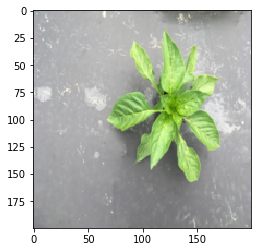

In [15]:
cropspics=[]
xsize=200
ysize=200
for name in cropsnames:
	pic=misc.imread(name)
	cropspics.append(misc.imresize(pic,(xsize,ysize)))

numofpics=len(cropspics)
print(cropspics[0].dtype)
print(numofpics)
print(cropspics[0].shape)

allimages=np.empty(shape=[numofpics,xsize,ysize,3])
for i in range(numofpics):
	allimages[i]=cropspics[i].astype(dtype="float32")
allimages/=255
plt.imshow(allimages[0])
plt.show()

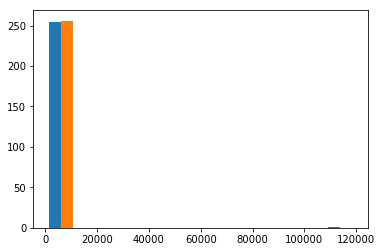

In [16]:
histo = np.histogram(allimages[0], bins=np.arange(0, 256))
plt.hist(histo)
plt.show()

In [17]:
from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

In [18]:
#img = img_as_float(allimages[0][::2, ::2])
img = allimages[0]
segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
segments_slic = slic(img, n_segments=250, compactness=10, sigma=1)
segments_quick = quickshift(img, kernel_size=3, max_dist=6, ratio=0.5)
gradient = sobel(rgb2gray(img))
segments_watershed = watershed(gradient, markers=250, compactness=0.001)

print("Felzenszwalb number of segments: {}".format(len(np.unique(segments_fz))))
print('SLIC number of segments: {}'.format(len(np.unique(segments_slic))))
print('Quickshift number of segments: {}'.format(len(np.unique(segments_quick))))
print('Compact watershed number of segments: {}'.format(len(np.unique(segments_watershed))))

Felzenszwalb number of segments: 76
SLIC number of segments: 204
Quickshift number of segments: 151
Compact watershed number of segments: 225


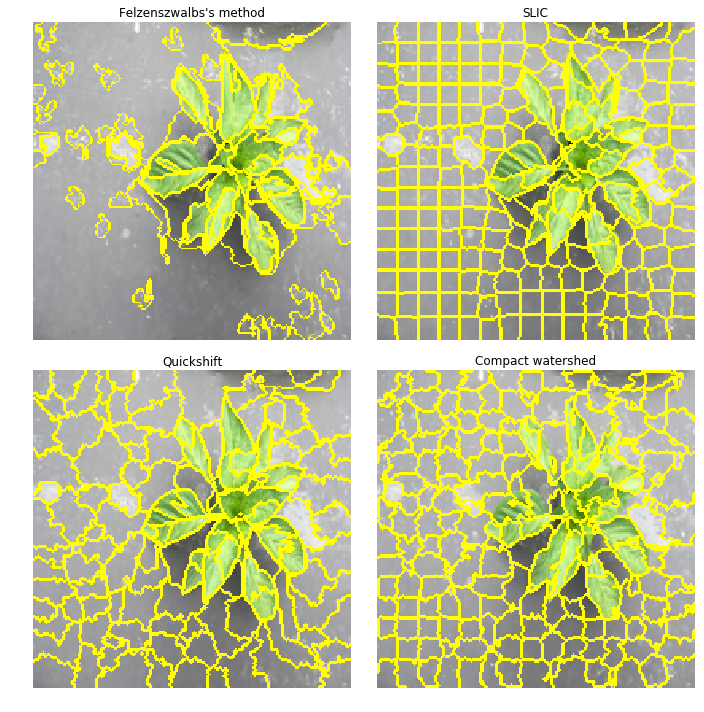

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True,
                       subplot_kw={'adjustable': 'box-forced'})

ax[0, 0].imshow(mark_boundaries(img, segments_fz))
ax[0, 0].set_title("Felzenszwalbs's method")
ax[0, 1].imshow(mark_boundaries(img, segments_slic))
ax[0, 1].set_title('SLIC')
ax[1, 0].imshow(mark_boundaries(img, segments_quick))
ax[1, 0].set_title('Quickshift')
ax[1, 1].imshow(mark_boundaries(img, segments_watershed))
ax[1, 1].set_title('Compact watershed')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()

In [20]:
print(img.shape)
print(img.size)
print(img)

(200, 200, 3)
120000
[[[ 0.63529412  0.64313725  0.6627451 ]
  [ 0.63137255  0.64313725  0.65882353]
  [ 0.62745098  0.64313725  0.65882353]
  ..., 
  [ 0.67058824  0.66666667  0.68235294]
  [ 0.69411765  0.69019608  0.69803922]
  [ 0.70588235  0.70588235  0.71372549]]

 [[ 0.63529412  0.64705882  0.6627451 ]
  [ 0.63529412  0.64313725  0.6627451 ]
  [ 0.63529412  0.64313725  0.66666667]
  ..., 
  [ 0.6745098   0.6745098   0.68627451]
  [ 0.69803922  0.69411765  0.70196078]
  [ 0.70196078  0.70196078  0.71372549]]

 [[ 0.63137255  0.63921569  0.6627451 ]
  [ 0.63137255  0.63921569  0.6627451 ]
  [ 0.63529412  0.64313725  0.67058824]
  ..., 
  [ 0.68235294  0.68235294  0.69411765]
  [ 0.70196078  0.69803922  0.70980392]
  [ 0.70588235  0.70196078  0.72156863]]

 ..., 
 [[ 0.51764706  0.52156863  0.53333333]
  [ 0.52156863  0.52156863  0.5372549 ]
  [ 0.51764706  0.52156863  0.53333333]
  ..., 
  [ 0.57647059  0.58039216  0.58823529]
  [ 0.56470588  0.56862745  0.58039216]
  [ 0.56862745

In [28]:
print(segments_fz.dtype)
print(segments_fz.shape)
print(segments_fz.size)
print(segments_fz)

int64
(200, 200)
40000
[[0 0 0 ..., 3 3 3]
 [0 0 0 ..., 3 3 3]
 [0 0 1 ..., 3 3 3]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [24]:
print(len(np.unique(segments_fz)))

76


In [27]:
print(np.unique(segments_fz))
print(mark_boundaries(img, segments_fz).shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75]
(200, 200, 3)


In [26]:
print(mark_boundaries(img, segments_fz))

[[[ 0.63529412  0.64313725  0.6627451 ]
  [ 0.63137255  0.64313725  0.65882353]
  [ 0.62745098  0.64313725  0.65882353]
  ..., 
  [ 0.67058824  0.66666667  0.68235294]
  [ 0.69411765  0.69019608  0.69803922]
  [ 0.70588235  0.70588235  0.71372549]]

 [[ 0.63529412  0.64705882  0.6627451 ]
  [ 0.63529412  0.64313725  0.6627451 ]
  [ 1.          1.          0.        ]
  ..., 
  [ 0.6745098   0.6745098   0.68627451]
  [ 0.69803922  0.69411765  0.70196078]
  [ 0.70196078  0.70196078  0.71372549]]

 [[ 0.63137255  0.63921569  0.6627451 ]
  [ 1.          1.          0.        ]
  [ 1.          1.          0.        ]
  ..., 
  [ 0.68235294  0.68235294  0.69411765]
  [ 0.70196078  0.69803922  0.70980392]
  [ 0.70588235  0.70196078  0.72156863]]

 ..., 
 [[ 0.51764706  0.52156863  0.53333333]
  [ 0.52156863  0.52156863  0.5372549 ]
  [ 0.51764706  0.52156863  0.53333333]
  ..., 
  [ 0.57647059  0.58039216  0.58823529]
  [ 0.56470588  0.56862745  0.58039216]
  [ 0.56862745  0.57254902  0.58823

In [33]:
print(mark_boundaries(img, segments_fz(1)).shape)

TypeError: 'numpy.ndarray' object is not callable

In [49]:
print(segments_fz[0].size)
print(segments_fz[199,150])

200
75


In [51]:
print(segments_fz[0].size)
print(segments_fz[:,:])
np.savetxt("segments_fz.csv",segments_fz[:,:],delimiter=",")

200
[[0 0 0 ..., 3 3 3]
 [0 0 0 ..., 3 3 3]
 [0 0 1 ..., 3 3 3]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
